<a href="https://colab.research.google.com/github/dazaca/ML_000_EXAMPLES/blob/main/knn_protein_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Algoritmo k-NN

  El algoritmo k-NN (vecinos más cercanos) es un algoritmo de aprendizaje supervisado. A partir de un conjunto inicial de datos etiquetados (objetos), éste permite clasificar (determinar la etiqueta asociada) un nuevo dato asociado del objeto a otro que no pertenezca al conjunto inicial. Esto lo consigue mediante la búsqueda de los k objetos más cercanos (por semejanza o proximidad) al objeto que se quiere clasificar y determinar la clase (etiqueta asociada) del objeto a partir de la clase mayoritaria entre estos k vecinos. 

  Esta semejanza/cercanía se mide a partir de una distancia (suele ser la distancia euclídea) entre el objeto muestra y el resto de todas las muestras de entrenamiento y será determinante, junto con el número k, para predecir cual es la mejor clasificación (etiqueta) que tiene el objeto.

  El algoritmo k-NN se utiliza a menudo en tareas de clasificación para el reconocimiento de patrones, reconocimiento de caracteres manuscritos, reconocimiento de imágenes, etc. También se utiliza en tareas de clasificación en el campo de la visión por ordenador. Igualmente se utiliza en tareas de regresión para predecir valores continuos, como la predicción del precio de la vivienda, la predicción del consumo de energía, etc.

  Aquí a continuación algunas de sus ventajas e inconvenientes: 


```markdown

---------------------------------------------------------------------
| Ventajas                                        
---------------------------------------------------------------------
  - Simple.
  - Fácil de entender. 
  - No requiere modelos matemáticos complejos.
  - Aplicable fácilmente.
  - No hace suposiciones sobre la distribución de los datos.
  - Puede utilizarse para la clasificación o la regresión.
  - Se adapta a diferentes medidas de distancia.
  - Buen rendimiento cuando los datos están bien estructurados.
---------------------------------------------------------------------
| Inconvenientes
---------------------------------------------------------------------
  - Sensible a los valores atípicos o extremos, que tienen gran
  - Éstos pueden tener un alto impacto en el cálculo de distancias.
  - Necesitan una gran cantidad de datos para funcionar correctamente.
  - Alto coste computacional si el conjunto de datos es muy grande.
  - Sensible a la dimensionalidad para encontrar vecinos significativos.



```


# 2 - Función de codificación 'one-hot'

In [ ]:
# Librerías -------------------------------------------------------------------


import csv # Librería "csv": nos permitirá trabajar con archivos csv.




m = []  # Variable vacía que recuperará el valor devuelto por la función "one-hot()"
        # y que nos permitirá probar el valor devuelto por ésta (dimensiones y
        # contenido).



# Función ---------------------------------------------------------------------


# Función 'one-hot()': recibe como parámetro la ruta del fichero csv 'ruta_csv'
# y devuelve en una tupla de dos elementos: 
# 1) la lista de listas 'm_encode' con las secuencias 
# codificadas 'one-hot' correspondientes a las secuencias de 17 aminoácidos
# almacenadas en dicho fichero en forma de vectores binarios de 20 elementos por cada
# aminoácido (array 3D en forma de lista de listas).
# 2) Una lista 'm2' con todas las clases almacenadas en la última columna del fichero.

def one_hot(ruta_csv):
 
  # Variables -----------------------------------------------------------

  # 'aminoac_dic': diccionario de aminoacidos. La 'key' es la letra
  # mayúscula del aminoácido y el valor el vector binario para realizar
  # la codificación one-hot:

  aminoac_dic = {
      
      'A': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'R': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'N': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'D': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'C': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'Q': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'E': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'G': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'H': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'I': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'L': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'K': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      'M': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      'F': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      'P': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      'S': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      'T': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      'W': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      'Y': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      'V': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
  }

  # 'm3': array auxiliar que contendrá la matriz de aminoácidos extraída del 
  # archivo csv, cuya ruta se pasará como parámetro a esta función 'one_hot()'.
  m3 = [] 

  # 'm2': lista que almacena todas las clases ('h', 'e' y '_') extraídas de la
  # última columna del fichero csv.
  m2 = []
  
  # 'm_encode': lista de listas que contendrá los valores codificados
  # de las secuencias de aminoácidos extraídas del array 'm3'. Cada fila
  # contendrá una lista con 17 listas, y cada una de éstas contendrá la 
  # secuencia codificada (20 caracteres binarios en forma de vector de ceros
  # y un '1') correspondiente a uno de los 17 aminoácidos de la secuencia original
  # representada por cada fila de 'm3'.
  m_encode = []

  # 'm_aux': lista auxiliar que recoge, mediante el uso del diccionario
  # 'aminoac_dic', el contendio de cada una de las filas de 'm_encode'.
  # Esta se completa por tanto con un total de 17 listas (cada una de las cuales
  # es un vector de 20 ceros y un '1'). 
  m_aux = [[]]

  # 'm_aux2': lista auxiliar que permite copiar el contenido de 'm_aux' 
  # para ir conformando 'm_encode'.
  m_aux2 = [[]]

  # 'tupla': tupla devuelta por la función que contendrá los valores 'm_encode' 
  # y 'm2'.

  # PASO 1 -----------------------------------------------------------
  
  # Almacenado del contenido de fichero en un array llamado 'm3'.
  # El delimitador escogido ';' va acorde con el usado en el fichero
  # data4.csv facilitado:
  with open(ruta_csv, newline='') as csvfile:
      csv_reader = csv.reader(csvfile, delimiter=';')
      m3 = list(csv_reader)

  

  # PASO 2 -----------------------------------------------------------
  
  # Formateado de la matriz de aminoacidos 'm3'.
  # Se elimina la primera fila y última columna de 'm3':

  # Eliminamos la primera fila con las cabeceras.
  del m3[0] 

  # A continuación calculamos el total de columnas de 'm3' (variable 
  # 'column') y a continuación  lo usamos para acceder al último elemento
  # de cada fila de 'm3', almacenándolo en 'm2' para luego 
  # eliminarlo en 'm3'. El número de columnas de 'm3' coincide con la 
  # longitud de cualquier fila de 'm3', por ello en este caso usamos la 
  # primera fila representada m3[0]:
  column = len(m3[0]) 
 
  for row in m3:
      m2.append(row[column-1])
      del row[column-1]
  

  # PASO 3 -----------------------------------------------------------

  # Creación de la matriz 'm_encod' que contiene la codificación 'one-hot'
  # de las secuencias contenidas en la matriz de aminoacidos 'm3'. 

  # Recorremos cada secuencia (vector de caracteres 'sec_amin') de 17 
  # aminoacidos que corresponden a cada una de las filas de la matriz 'm3':
  for sec_amin in m3: 

    # Para cada uno de los aminoácidos 'amin' en la secuencia 'sec_amin',
    # se añade su secuencia codificada correspondiente, extraída a partir del
    # diccionario 'aminoac_dic' al vector 'm_aux', el cual se vacía cada vez 
    # que empezamos a recorrer una nueva secuencia de 17 aminoácidos al completo:
    del m_aux[:]
    for amin in sec_amin:
      m_aux.append(aminoac_dic[amin])
      m_aux2 = m_aux[:]
    
    # Insertamos en 'm_conde' la lista de 17 vectores binarios de 20 elementos 
    # recogida por 'm_aux2' en cada iteración del segundo bucle 'for' anidado).
    m_encode.append(m_aux2)

  # Final de la función. Constituye y devuelve una tupla 'tupla' con 2 listas:
  # 1) todo el contenido de 'm_encode' tras haber sido rellenada con el conjunto
  # de todas las secuencias codificadas de 17 aminoácidos.
  # 2) la lista 'm2' que contine el vector formado por todas las clases de 
  # estructura de proteína a la que pertenece cada grupo de 17 aminoácidos.
  tupla = (m_encode,m2)
  return tupla

# Fin de la función ----------------------------------------------------


# Probamos la función asignádole su valor devuelto a la variable 'one_hot_tupla',
# cuyo contenido imprimiremos por pantalla posteriormente:

one_hot_tupla = one_hot('/content/sample_data/data4s.csv')

# Recuperamos el contenido de las dos listas almacenadas en 'one_hot_tupla':

# Lista de listas con las secuencias codificadas.
m = one_hot_tupla[0] 
# Lista con el vector de todas las clases de las secuencias.
clases = one_hot_tupla[1]

# Total de filas:
print("- Filas:", len(m))
# Total de vectores binarios por fila:
print("- Vectores por fila:", len(m[0]))
# Total de elementos por vector binario:  
print("- Elementos por vector:", len(m[0][0]))
# Primer elemento del primer vector (primer aminoácido) de la primera secuencia:
print(m[0][0])
print("Lista con todas las clases: ", clases)
print(m)

# 3 - Script clasificador k-NN

In [ ]:
# Librerías -------------------------------------------------------------------
# ------------------------------------------------------------------------------


# Usada para el control del flujo de ejecución del script (salida).
import sys  
# Usada para la verificación de archivos en el sistema.
import os
import time
# Usada para la gestión de ficheros csv.
import csv
# Librería matemática (permite operar con matrices, entre otras).
import numpy as np
# Importamos la función 'train_test_split()' de la biblioteca Scikit-Learn
# que usaremos para la construcción de los sets de training y test.
from sklearn.model_selection import train_test_split
# Importamos la clase 'KNeighborsClassifier' que contendrá las funciones
# para aplicar el algoritmo 'k-NN'.
from sklearn.neighbors import KNeighborsClassifier
# Usada para utilizar la función crosstab() para observar el rendimiento del 
# algoritmo k-NN para distintos valores de k.
import pandas as pd
# Uso de librerías gráficas para la impresión de la curva ROC.
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score



# Funciones --------------------------------------------------------------------
# ------------------------------------------------------------------------------



# ---------------------------------------------------------------------------
# Función 'main_menu()'. Función principal para controlar el flujo del script.

def main_menu():

    # La variable 's' recoge la cadena correcta que contiene la ruta y nombre
    # del archivo csv devuelta por la función 'obten_csv()'. En caso contrario,
    # abortamos el flujo principal del script y salimos con un mensaje.
    s = obten_csv()
    if not s: sys.exit("Script abortado.")

    # El script continua si se ha podido acceder al fichero csv correctamenete.    
    # Se accede así al fichero y se recupera la información llamando a la función 
    # 'one_hot()' (ver uso de esta función en el apartado 2) y almacenando el
    # contenido en la variable tipo tupla 'one_hot_tupla':
    one_hot_tupla = one_hot(s)

    # Recuperamos el valor de la lista de listas con las secuencias codificadas 
    # almacenándolas en 'm'.
    m = one_hot_tupla[0] 

    # Recuperamos la lista con el vector de todas las clases de las secuencias.
    # Estas clases pueden ser de tipo 'h'(alfa-helix), 'e' (beta-sheet) o '_' (coil).
    clases = one_hot_tupla[1]

    # Creamos un diccionario donde almacenaremos los vectores de clases de
    # estructuras resultantes del entrenamiento k-NN para k=1,3,5,7,11 con el
    # criterio de clasificación basado en 'h', 'e' o '_'.
    dic_entrena = {}

    # Creamos un diccionario donde almacenaremos los vectores de clases de
    # estructuras resultantes del entrenamiento k-NN para k=1,3,5,7,11 con el
    # criterio de clasificación basado en 'coil' o 'non-coil'.
    dic_entrena_coil = {}
    
    print("Se ha podido acceder correctamente al fichero csv con ruta: ", s, "\n\n")

    while True:

      print("Script clasificador knn:\n\n")
      print("1 - Obtener tabla resumen de clases.")
      print("2 - Generar fichero de secuencias con codificación 'one-hot()'.")
      print("3 - Preparar datos para training (67%) y test (33%).")
      print("4 - Genera vectores de estructuras (clases) predichas con k-NN (k=1,3,5,7,11).")
      print("5 - Generar nueva predicción con grupos coil y non-coil (k=1,3,5,7,11) + curva ROC y AUC asociada.")
      print("6 - Finalizar script.")

      choice = input("\nIntroduzca una opción (1-6): ")
      
      if choice == '1':
        resumen_clases(clases)
        input("\nPresione la tecla ENTER para continuar...")
        borra_pantalla()

      elif choice == '2':
        represent_sec(m)
        input("\nFichero con secuencias codificadas generado correctamente en './sec_oh_enc.csv'.")
        borra_pantalla()

      elif choice == '3':

        # Esta línea contiene los 4 arrays numpy que usaremos posteriormente
        # para aplicar el algoritmo k-NN para hacer las predicciones de clases
        # sobre 'm_test'.
        m_train, m_test, c_train, c_test = prep_train_test(m,clases)

        # Mostramos por pantalla un breve informe de los datos preparados:
        presenta_datos_prep(m_train, m_test, c_train, c_test)
        input("\nPresione la tecla ENTER para continuar...")
        borra_pantalla()

      elif choice == '4':

        # Presentamos el resumen de las predicciones de estructuras
        # a partir de los vectores de clases obtenidos con la
        # función 'predice_knn()', los cuales son pasados como
        # parámetro a la función 'presenta_k()':
        dic_entrena = presenta_k(m_train, m_test, c_train, c_test)

        input("\nPresione la tecla ENTER para continuar...")
        borra_pantalla()

      elif choice == '5':
        
        # Procedemos como en la opción 4, pero "formateando"
        # el contenido de 'c_train' con ayuda de la función
        # 'tranfsforma_coil()' como paso previo al cálculo de
        # los vectores con las predicciones.
        
        c_train_coil = tranfsforma_coil(c_train)
        dic_entrena_coil = presenta_k(m_train, m_test, c_train_coil)

        input("\nPresione la tecla ENTER para continuar...")
        borra_pantalla()
      
      elif choice == '6':
        salir()
        break

      else:
        print("Opción incorrecta: introduca número del 1 al 6.\n\n")
        main_menu()



# --------------------------------------------------------------------
# Función 'obten_csv()'. Devuelve el valor de la ruta/nombre del fichero
# CSV si se introduce correctamente, en caso contrario devuelve el valor 
# de 'None', indicandando al flujo principal del script que el usuario 
# quiere salir del script.

def obten_csv():
  
  while True:

    borra_pantalla()
    ruta_csv = input("Ruta del fichero csv (pulse 'q' o 'Q' para salir): ")
    
    if ruta_csv.lower() == "q":
      break

    if not ruta_csv:
      print("Introduzca ruta y nombre del fichero CSV.")
      input("\nPresione la tecla ENTER para continuar...")
      borra_pantalla()
      continue

    if not os.path.exists(ruta_csv):
      print("Ruta incorrecta, inténtelo de nuevo.")
      input("\nPresione la tecla ENTER para continuar...")
      borra_pantalla()
      continue
    
    try:
      with open(ruta_csv):
        pass

    except IOError:
      print("No se pudo abrir el fichero. Revíselo e inténtelo de nuevo.")
      input("\nPresione la tecla ENTER para continuar...")
      borra_pantalla()
      continue
    
    return ruta_csv
  
  return None 

# --------------------------------------------------------------------
# Función 'resumen_clases()'. Recibe como parámetro el vector de clases
# y elabora con él una tabla resumen del recuento de las mismas.

def resumen_clases(clases):
  
    cuenta_beta = 0
    cuenta_coil = 0
    cuenta_alpha = 0
    texto1 = " Secuencia tipo: "
    texto2 = " Recuento:       "
    texto3 = "Alpha-helix"
    texto4 = "Beta-sheet"
    texto5 = "Coil" 
        
    for simbolo in clases:
      if simbolo == 'h':
        cuenta_alpha += 1
      elif simbolo == 'e':
        cuenta_beta += 1
      else:
        cuenta_coil += 1

    dif_1 = len(texto3)-len(str(cuenta_alpha))
    dif_2 = len(texto4)-len(str(cuenta_beta))
    dif_3 = len(texto5)-len(str(cuenta_coil))


    print("+" + len(texto1) * "-" + "--+" +
          len(texto3) * "-" + "---+" +
          len(texto4) * "-" + "---+" +
          len(texto5) * "-" + "---+" )

    print("|" + texto1 + "  |  " + texto3 + " |  " +
          texto4 + " |  " + texto5 + " |  ")

    print("+" + len(texto1) * "-" + "--+" +
          len(texto3) * "-" + "---+" +
          len(texto4) * "-" + "---+" +
          len(texto5) * "-" + "---+" )

    print("|" + texto2 + "  |  " +
          str(cuenta_alpha) + 
          " " * dif_1 + " |  " +
          str(cuenta_beta) + 
          " " * dif_2 + " |  " +
          str(cuenta_coil) +
          " " * dif_3 + " |  " )

    print("+" + len(texto1) * "-" + "--+" +
          len(texto3) * "-" + "---+" +
          len(texto4) * "-" + "---+" +
          len(texto5) * "-" + "---+" )

    pass



# --------------------------------------------------------------------
# Función 'one_hot()' (ver descripción en apartado 2).

def one_hot(ruta_csv):
 
  aminoac_dic = {
      
      'A': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'R': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'N': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'D': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'C': [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'Q': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'E': [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'G': [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'H': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'I': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'L': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      'K': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      'M': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      'F': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      'P': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      'S': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      'T': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      'W': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      'Y': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
      'V': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
  }

  m3 = [] 
  m2 = []
  m_encode = []
  m_aux = [[]]
  m_aux2 = [[]]

  with open(ruta_csv, newline='') as csvfile:
      csv_reader = csv.reader(csvfile, delimiter=';')
      m3 = list(csv_reader)

  del m3[0] 

  column = len(m3[0]) 
  
  for row in m3:
      m2.append(row[column-1])
      del row[column-1]

  for sec_amin in m3:
    del m_aux[:] 
    
    for amin in sec_amin:
       m_aux.append(aminoac_dic[amin])
       m_aux2 = m_aux[:]
    
    m_encode.append(m_aux2)
    
  tupla = (m_encode,m2)
  
  return tupla

# --------------------------------------------------------------------
# Función 'represent_sec()'. Permite representar la secuencia codificada
# obtenida de aplicar la función 'one_hot()' al fichero CSV de secuencias
# de 17 aminoácidos cuya ruta se pasa al iniciar el script. La función
# genera dicha representación en forma de fichero en el directorio raiz
# del script con nombre 'sec_oh_enc.csv'.

def represent_sec(secuencia):
    
    fichero = './sec_oh_enc.csv'

    with open(fichero, 'w', newline='') as file:
        writer = csv.writer(file)
        
        # Escribe las cabeceras del fichero (primera fila).
        cabecera = ['V' + str(i+1) for i in range(len(secuencia[0])*len(secuencia[0][0]))]
        writer.writerow(cabecera)
        
        # Rellena las siguientes filas con el contenido de 'secuencia' (lista de listas con 
        # las secuencias ya codificadas que se obtuvieron con la función 'one_hot()').

        # Por cada secuencia ('fila'), en este caso de 17 listas ('sublist') 
        # de 20 elementos ('cero_uno'), se almacenan todos éstos (un total de
        # 17x20 = 340) en 'concat_elem'. El contenido de esta lista de 340 es
        # luego escrita en el fichero CSV por cada una de estas secuencias 'fila'.

        for fila in secuencia:
            concat_elem = [str(cero_uno) for sublist in fila for cero_uno in sublist]
            writer.writerow(concat_elem)
    pass

# --------------------------------------------------------------------
# Función 'prep_train_test()'. Recibe la lista de listas con las secuencias 
# codificadas 'm_codif' y sus clases. Devuelve: 1) 2 arrays numpy, uno 
# generada con el 67% de los datos de aquélla y la otro con los del 33%.  
# restante. Esta selección se hace usando la semilla aleatoria 123.
# Para ello se usará la función 'train_test_split()' de la librería
# 'scikit-learn' ('sklearn'). Una vez obtenidos ambos arrays numpy, se 
# extraerán y luego eliminarán de éstos sus vectores de clases asociados, 
# 'c_train' y 'c_test', que serán también devueltos por esta función.
 
def prep_train_test(m_codif, clases):

  # Adjuntamos (en nueva lista de listas local 'm_codif_clases') el 
  # vector 'clases' a 'm_codif'.
  m_codif_clases = [m_codif[i]+[clases[i]] for i in range(len(m_codif))]

  # Convertimos 'm_codif_clases' a un array numpy 'm_np' para poder pasarlo
  # a continuación como parámetro a la función 'train_test_split()'.
  # Para evitar el warning 'VisibleDeprecationWarning' introducimos como
  # segundo parametro de la función np.array() el valor de 'dtype=object'.
  m_np = np.array(m_codif_clases, dtype=object)
  
  # La función 'train_test_split()' permite generar las dos matrices
  # de training y test pedidas a partir de la matriz pasada 'm_np' y
  # usando 123 como semilla aleatoria. 
  m_train, m_test = train_test_split(m_np, test_size=0.33, random_state=123)
  
  # Una vez generadas 'm_train' y 'm_test', extraeremos de ellas sus
  # vectores de clases asociados (elementos de la última columna).
  c_train = m_train[:, -1]
  c_test = m_test[:, -1]

  # Seguidamente eliminamos esta última columna de clases en ambos 
  # arrays 'm_train' y 'm_test'.
  m_train = m_train[:, :-1]
  m_test = m_test[:, :-1]

  # A continuación se modifica la estructura de 'm_train' y 'm_test' para
  # poder ser utilizados posteriormente en la función 'knn.fi()' dentro 
  # de 'predice_knn()':
  filas_train = m_train.shape[0]  
  filas_test = m_test.shape[0]
  vectores = len(m_train[0])
  elementos = len(m_train[0][0])

  nueva_structura_train = (filas_train, vectores*elementos)  
  nueva_structura_test = (filas_test, vectores*elementos)  

  # Las dos siguientes líneas modifican la estructura de los arrays
  # numpy 'm_train' y 'm_test':
  m_train_2d = np.array(m_train.tolist()).reshape(nueva_structura_train)
  m_test_2d = np.array(m_test.tolist()).reshape(nueva_structura_test)   

  return m_train_2d, m_test_2d, c_train, c_test
  pass

# --------------------------------------------------------------------
# Función 'predice_knn()'. Recibe como parámetros: 1) un array numpy 
# 'm_train' con los datos de entrenamiento. 2) un array numpy 'm_test' 
# con los datos de test. 3) un vector 'c_train' con las clases (etiquetas)  
# asociadas a cada fila de la matriz de datos de entrenamiento. 4) un entero 
# 'k' indicando el número a utilizar de vecinos cercanos.
# La función devuelve el vector con las clases predichas para cada fila
# de la matriz de datos de test.

def predice_knn(m_train, m_test, c_train, k):

  # Creamos una instancia de la clase 'KNeighborsClassifier' con el valor
  # especificado de 'k' y la ajustamos a los datos de entrenamiento y las
  # etiquetas en 'c_train' utilizando el método fit. Con ellos luego 
  # podremos generar, con ayuda de la función 'predict()', el vector que 
  # contendrá las clases (etiqueta) predichas para cada secuencia  
  # codificada (fila) contenida en el array numpy 'm_test'.

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(m_train, c_train)
  return knn.predict(m_test)

  pass

# --------------------------------------------------------------------
def predice_knn2():
  pass

# --------------------------------------------------------------------
# Función 'salir()'. Va asociada a la opción 6 del menú principal del
# script y permite interrumpir la ejecución del programa para permitir
# al usuario salir del script.

def salir():
    print("\n\nFinalizando script...")
    try:
        sys.exit()
    except SystemExit:
        # El uso de la función sys.exit() genera una excepción en el  
        # kernel de Jupiter ("SystemExit"). En este bloque capturamos dicha 
        # excepción forzando que la función acabe correctamente para poder 
        # así finalizar el script en este punto sin mostrar esta excepción
        # capturada:
        print("\nScript finalizado.\n\n")
        pass

# --------------------------------------------------------------------
# Función 'borra_pantalla()'. Permite borrar la pantalla y actualizarla
# con el contenido del menú principal al ejecutarla desde cada uno de 
# los bloques principales de las opciones (1-6) de dicho menú.

def borra_pantalla():
    if os.name == "posix":
        _ = os.system("clear")
    else:
        _ = os.system("cls")

# --------------------------------------------------------------------
# Función 'presenta_datos_prep()'. Permite presentar un resumen de 
# los datos preparados para el entrenamiento los cuales se pasan
# como parámetros: 'm_train' (matriz con los datos de entrenamiento),
# 'c_train' (vector con las clases asociadas a 'm_train')
# y 'm_test' (matriz con los datos de test).

def presenta_datos_prep(m_train, m_test, c_train, c_test):
  
  print("Se han creado los datos de entrenamiento 'm_train' y test 'm_test':\n\n")
  print("- Total de elementos en el vector de clases de training 'c_train': ", len(c_train))
  print("- Total de elementos en el vector de clases de test 'c_test': ", len(c_test))
  print("- Total de filas en la matriz de test 'm_train': ", len(m_train))
  print("- Total de filas en la matriz de training 'm_test': ", len(m_test))

  return

# --------------------------------------------------------------------
# Función 'presenta_k()'. Permite presentar un resumen de los vectores
# de clases obtenidos de las predicciones para k = 1, 3, 5, 7 y 11 y 
# almacena y devuelve en un diccionario dichos vectores. La función 
# recibe como parámetros los arrays de datos de training y test preparados.

def presenta_k(m_train, m_test, c_train, c_test):

  # 'c_entrenados' es el diccionario que devolverá los vectores 
  # de predicciones para los distintos valores de k.
  c_entrenados = {}

  c_variables = [['c_k1', 1], ['c_k3', 3], ['c_k5', 5], ['c_k7', 7], ['c_k11', 11]]

  for valor in c_variables:
    # 'expresion_predice_knn' recupera el valor devuelto por la expresión
    #  asociada a la llamada a la función 'predice_knn()' para cada
    #  valor de k (1, 3, 5, 7 y 11):
    expresion_predice_knn = eval('predice_knn(m_train, m_test, c_train, {})'.format(valor[1]))
    primeros_10 = expresion_predice_knn[:10]
    ultimos_10 = expresion_predice_knn[-10:]

    # Por cada valor de k, presentamos una muestra de los vectores de 
    # predicciones, cuyos valores iremos almacenando en el diccionario.
    borra_pantalla()
    print("\nVector de estructuras predicho para k = " + str(valor[1]) + ".\n")
    print("Resumen de elementos:\n")
    print("10 primeros:" + str(primeros_10))
    print("10 ultimos: " + str(ultimos_10))

    # Imprimimos la tabla de contingencia asociada para visualizar
    # el rendimiento del algoritmo para cada valor de k.
    print("\nTabla de contingencia (x100) asociada:\n")
    evalua_rendimiento(expresion_predice_knn,c_test)
    input("\n\n Presione la tecla ENTER para continuar...")
    borra_pantalla()
    # Rellenando del diccionario que asocia el valor devuelto por 
    # 'expresion_predice_knn' en cada iteración con su correspondiente
    # clave especificada antes en 'c_variables' (c_k1, c_k3, etc.):
    c_entrenados [valor[0]] = expresion_predice_knn
    
  return c_entrenados

# --------------------------------------------------------------------
# Función 'transforma_coil()'. Dado un vector de caracteres de clases
# pasado como parámetro, permite transformarlo en otro donde los 
# caracteres 'h' y 'e' serán sustituidos por 'c' (grupo "coil") y los
# caracteres '_' por 'n' (grupo "non-coil").

def tranfsforma_coil(vector):

  vector_coil = ['c' if x in ['h', 'e'] else 'n' for x in vector]

  return vector_coil

# --------------------------------------------------------------------
# Función 'evalua_rendimiento()'. Recibe el vector 'c_k' con
# la predicción de clases y el vector 'c_test' con los valores conocidos
# de las clases del conjunto de datos sometidos a test. Elabora una 
# tabla de contingencia donde se pueden observar los porcentajes de
# verdaderos/falsos positivos/negativos. Igualmente imprime por pantalla
# la curva ROC asociada a cada valor de k, así como el valor del
# área bajo la misma.

def evalua_rendimiento(c_k, c_test):

  # Creación de la tabla de contingencia de proporciones previa
  # normalización de los datos de los vectores.
  tabla_contingencia = pd.crosstab(c_k, c_test, normalize=True)

  # Calcula Verdaderos Positivos, Verdaderos Negativos, Falsos Positivos, y Falsos Negativos
  verdadero_positivo = tabla_contingencia.values.diagonal()
  falso_positivo = tabla_contingencia.sum(axis=0).values - verdadero_positivo
  falso_negativo = tabla_contingencia.sum(axis=1).values - verdadero_positivo
  verdadero_negativo = 1 - (verdadero_positivo + falso_positivo + falso_negativo)

  # Creación de la tabla.
  tabla = pd.DataFrame({
      "Verdaderos Negativos": verdadero_negativo,
      "Falsos Positivos": falso_positivo,
      "Falsos Negativos": falso_negativo,
      "Verdaderos Positivos": verdadero_positivo
  }, index=tabla_contingencia.index)

  # Impresión por pantalla de la tabla.
  print(tabla)

  # Cálculo de la curva ROC multiclase ('h', 'e' y '_').
  fpr, tpr, thresholds = roc_curve(pd.get_dummies(c_test).values.ravel(), pd.get_dummies(c_k).values.ravel())
  auc_roc = roc_auc_score(pd.get_dummies(c_test).values, pd.get_dummies(c_k).values, multi_class='ovr')

  # Impresión del valor del AUC
  print("\nÁrea bajo la curva ROC (multiclase):", auc_roc)

  input("\n\n Presione la tecla ENTER para continuar...")
  borra_pantalla()

  # generar gráfico de la curva ROC
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % auc_roc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Tasa de falsos positivos')
  plt.ylabel('Tasa de verdaderos positivos')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")
  plt.show()

  return

# --------------------------------------------------------------------
# Función 'curva()'. Genera la curva 

# --------------------------------------------------------------------
if __name__ == '__main__':
    try:
        main_menu()
    # Captura cualquier excepción levantada durante cualquier momento de la
    # ejecución del menú principal.    
    except Exception as e:
        print('An error occurred:', e)
        sys.exit(1)

## 3.1 - Resultados

### 3.1.1 - Lectura de datos

Tras la carga del fichero 'data4s.csv' (versión simplificada del fichero 'data4.csv') para la prueba de la función 'one_hot()' (ruta usada corresponde a 
'/content/sample_data/data4s.csv' cuando se ejecuta desde Google Colab), comprobamos que la función se ejecuta correctamente (carga y visualización) para una muestra pequeña de datos.




```markdown

- Filas: 4
- Vectores por fila: 17
- Elementos por vector: 20
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Lista con todas las clases:  ['_', '_', '_', 'e']
[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]]

```



Posteriormente, comprobamos la carga correcta del fichero 'data4.csv' tras la primera ejecución del script:



```Markdown

Ruta del fichero csv (pulse 'q' o 'Q' para salir): data4.csv
Se ha podido acceder correctamente al fichero csv con ruta:  data4.csv 


Script clasificador knn:


1 - Obtener tabla resumen de clases.
2 - Generar fichero de secuencias con codificación 'one-hot()'.
3 - Preparar datos para training (67%) y test (33%).
4 - Genera vectores de estructuras (clases) predichas con k-NN (k=1,3,5,7,11).
5 - Generar nueva predicción con grupos coil y non-coil (k=1,3,5,7,11) + curva ROC y AUC asociada.
6 - Finalizar script.

Introduzca una opción (1-6): 


```

A través de la opción 1 en el menú del script, mostramos la tabla con el número de secuencias que existen para cada clase:



```Markdown

+-------------------+--------------+-------------+-------+
| Secuencia tipo:   |  Alpha-helix |  Beta-sheet |  Coil |  
+-------------------+--------------+-------------+-------+
| Recuento:         |  2508        |  1935       |  5557 |  
+-------------------+--------------+-------------+-------+

Presione la tecla ENTER para continuar...


```

### 3.1.2 - Ejecución de la función 'one_hot()' y codificación de las secuencias

La opción 2 del menú nos permite generar el fichero 'sec_oh_enc.csv' (ver como fichero adjunto a esta práctica) en el mismo directorio raiz donde se ejecuta el script. Este fichero contiene todas las secuencias de aminoácidos del fichero 'data4.csv' codificadas con la codificación 'one-hot':


```markdown

Script clasificador knn:


1 - Obtener tabla resumen de clases.
2 - Generar fichero de secuencias con codificación 'one-hot()'.
3 - Preparar datos para training (67%) y test (33%).
4 - Genera vectores de estructuras (clases) predichas con k-NN (k=1,3,5,7,11).
5 - Generar nueva predicción con grupos coil y non-coil (k=1,3,5,7,11) + curva ROC y AUC asociada.
6 - Finalizar script.

Introduzca una opción (1-6): 2

Fichero con secuencias codificadas generado correctamente en './sec_oh_enc.csv'.


```

### 3.1.3 - Preparación de los datos de training y test

A continuación presentamos el resumen de las características principales de los datos pedidos para training (un 67% del total) y test (un 33%) que son visualizados por pantalla automáticamente tras la preparación de los mismos:

```markdown

Introduzca una opción (1-6): 3

Se han creado los datos de entrenamiento 'm_train' y test 'm_test':


- Total de elementos en el vector de clases de training 'c_train':  6700
- Total de elementos en el vector de clases de test 'c_test':  3300
- Total de filas en la matriz de test 'm_train':  6700
- Total de filas en la matriz de training 'm_test':  3300

Presione la tecla ENTER para continuar...

```

### 3.1.4 - Predicción estructura secundaria secuencias de test

La opción 4 del menú nos permite utilizar el algoritmo k-NN (para k = 1, 3, 5, 7, 11) basado en el training para predecir la estructura secundaria de
las secuencias del test ('h', 'e' o '_'). Aquí los resultados obtenidos de la predicción que son mostrados por pantalla (selección de algunas etiquetas predichas para las secuencias, tabla de contingencia con falos/verdaderos positivos/negativos y curva ROC con su AUC asociada):




```markdown

Vector de estructuras predicho para k = 1.

Resumen de elementos:

10 primeros:['h' '_' '_' 'h' 'e' 'h' 'h' '_' '_' 'e']
10 ultimos: ['_' 'e' '_' '_' 'e' '_' '_' '_' '_' '_']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
_                  0.347273          0.100606          0.098485              0.453636
e                  0.721212          0.070000          0.069091              0.139697
h                  0.690909          0.070000          0.073030              0.166061

Área bajo la curva ROC (multiclase): 0.7973620935563309

```

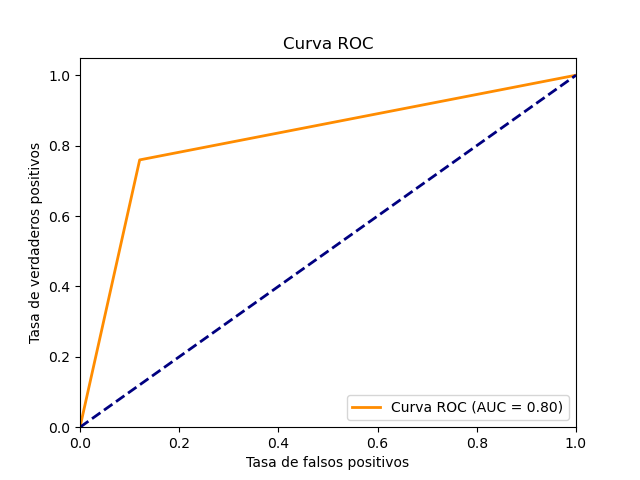


```markdown

Vector de estructuras predicho para k = 3.

Resumen de elementos:

10 primeros:['_' '_' '_' 'e' 'e' 'h' 'h' '_' '_' '_']
10 ultimos: ['_' 'e' '_' '_' '_' '_' '_' '_' '_' '_']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
_                  0.280303          0.088788          0.165455              0.465455
e                  0.732424          0.100909          0.057879              0.108788
h                  0.698485          0.099091          0.065455              0.136970

Área bajo la curva ROC (multiclase): 0.7347879685246287


```

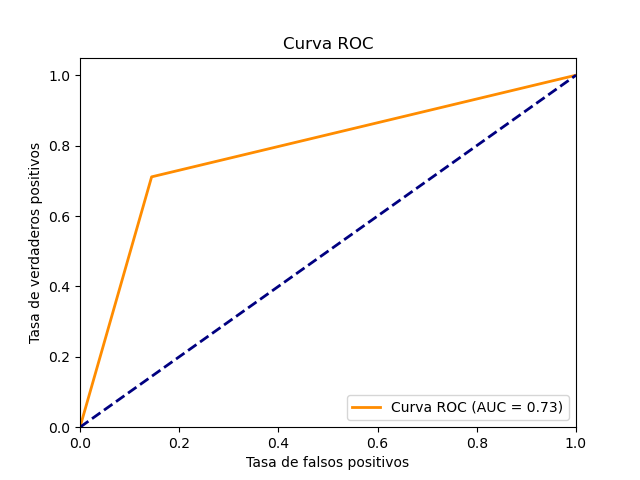


```markdown

Vector de estructuras predicho para k = 5.

Resumen de elementos:

10 primeros:['_' '_' '_' 'e' 'e' 'h' 'h' '_' '_' '_']
10 ultimos: ['_' 'e' '_' '_' '_' '_' '_' 'e' '_' '_']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
_                  0.248182          0.084242          0.197576              0.470000
e                  0.728485          0.118485          0.061818              0.091212
h                  0.705758          0.114848          0.058182              0.121212

Área bajo la curva ROC (multiclase): 0.6998062140877582


```

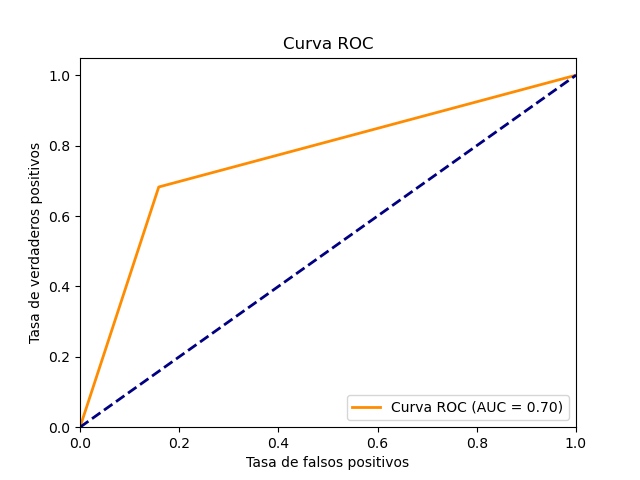


```markdown

Vector de estructuras predicho para k = 7.

Resumen de elementos:

10 primeros:['_' '_' '_' 'e' 'e' 'h' 'h' '_' '_' '_']
10 ultimos: ['_' 'e' '_' '_' '_' '_' '_' '_' '_' '_']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
_                  0.222727          0.082727          0.223030              0.471515
e                  0.727879          0.129091          0.062424              0.080606
h                  0.703030          0.134545          0.060909              0.101515

Área bajo la curva ROC (multiclase): 0.6676852970159278


```

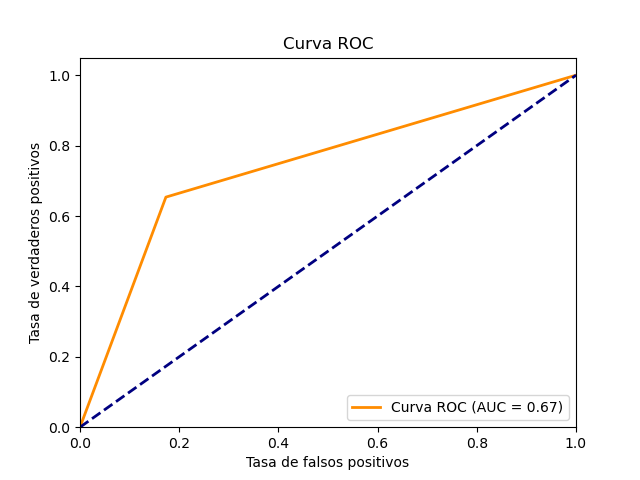


```markdown

Vector de estructuras predicho para k = 11.

Resumen de elementos:

10 primeros:['_' 'h' '_' 'e' 'e' 'h' 'h' '_' '_' 'h']
10 ultimos: ['_' 'e' '_' '_' '_' '_' '_' '_' '_' '_']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
_                  0.181515          0.071515          0.264242              0.482727
e                  0.738182          0.143636          0.052121              0.066061
h                  0.706061          0.159091          0.057879              0.076970

Área bajo la curva ROC (multiclase): 0.6295911949891172


```

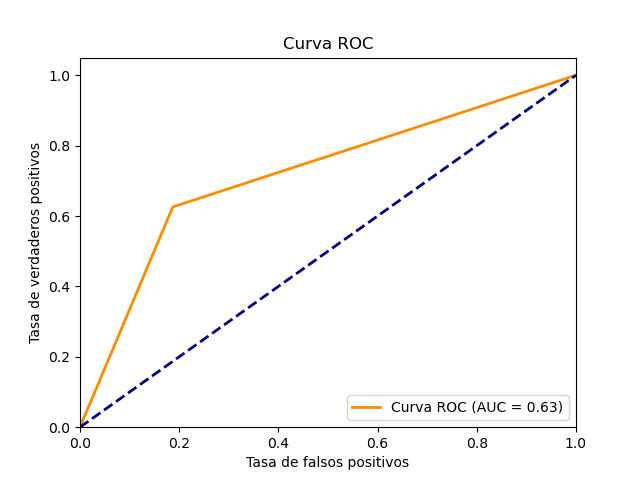

### 3.1.5 - Predicción alternativa con nueva clasificación 'coil / non-coil'

Procedemos igual que para la opción 4, pero esta vez a través de una nueva clasificación basada únicamente en dos etiquetas: coil (c) y non-coil (n):


```markdown

Vector de estructuras predicho para k = 1.

Resumen de elementos:

10 primeros:['c' 'n' 'n' 'c' 'c' 'c' 'c' 'n' 'n' 'c']
10 ultimos: ['n' 'c' 'n' 'n' 'c' 'n' 'n' 'n' 'n' 'n']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
c                  0.453636          0.098485          0.100606              0.347273
n                  0.347273          0.100606          0.098485              0.453636

Área bajo la curva ROC (multiclase): 0.7987709532090992




Vector de estructuras predicho para k = 3.

Resumen de elementos:

10 primeros:['n' 'n' 'n' 'c' 'c' 'c' 'c' 'n' 'n' 'n']
10 ultimos: ['n' 'c' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
c                  0.436667          0.127879          0.117576              0.317879
n                  0.317879          0.117576          0.127879              0.436667

Área bajo la curva ROC (multiclase): 0.750491273050435




Vector de estructuras predicho para k = 5.

Resumen de elementos:

10 primeros:['n' 'n' 'n' 'c' 'c' 'c' 'c' 'n' 'n' 'c']
10 ultimos: ['n' 'c' 'n' 'n' 'n' 'n' 'n' 'c' 'n' 'n']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
c                  0.437273          0.152121          0.116970              0.293636
n                  0.293636          0.116970          0.152121              0.437273

Área bajo la curva ROC (multiclase): 0.7238456337747574




Vector de estructuras predicho para k = 7.

Resumen de elementos:

10 primeros:['n' 'n' 'n' 'c' 'c' 'c' 'c' 'n' 'n' 'c']
10 ultimos: ['n' 'c' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
c                  0.428788          0.164848          0.125455              0.280909
n                  0.280909          0.125455          0.164848              0.428788

Área bajo la curva ROC (multiclase): 0.7019151750686408




Vector de estructuras predicho para k = 11.

Resumen de elementos:

10 primeros:['n' 'c' 'n' 'c' 'c' 'c' 'c' 'n' 'c' 'c']
10 ultimos: ['n' 'c' 'n' 'n' 'n' 'n' 'n' 'n' 'c' 'n']

Tabla de contingencia (x100) asociada:

       Verdaderos Negativos  Falsos Positivos  Falsos Negativos  Verdaderos Positivos
row_0                                                                                
c                  0.423030          0.187879          0.131212              0.257879
n                  0.257879          0.131212          0.187879              0.423030

Área bajo la curva ROC (multiclase): 0.6708883131093988


```